In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

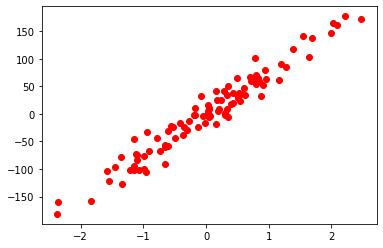

In [3]:
plt.plot(X_numpy, y_numpy, 'ro')

In [4]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

In [3]:
#model
input_size = n_features
output_size = 1

model = nn.Linear(input_size,output_size)

In [4]:
criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [5]:
#trainging loop
num_epochs = 100 
for epoch in range(num_epochs):
    y_pred = model(X) #forward pass
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch:{epoch + 1}, loss:{loss:.4f}')

epoch:10, loss:4074.6477
epoch:20, loss:2870.6499
epoch:30, loss:2050.0588
epoch:40, loss:1490.6595
epoch:50, loss:1109.2334
epoch:60, loss:849.1041
epoch:70, loss:671.6619
epoch:80, loss:550.5989
epoch:90, loss:467.9855
epoch:100, loss:411.5995


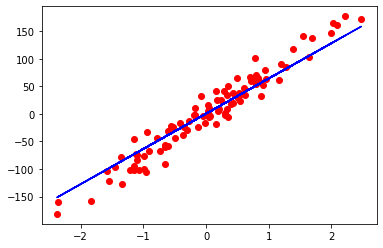

In [6]:
#plot

predicted = model(X).detach().numpy()
# with torch.no_grad():
#     predicted = model(X)

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()